# Demonstrate animation_tools module

This notebook demonstrates the tools in the `animation_tools` module, which facilitates creating a list of figures or images and viewing them as an animation.  

Currently two approaches are supported with complementary pros and cons:

 - Using the `ipywidgets.interact` allows generating an interactive widget for sweeping through the frames.  This may be easiest to work with when running a notebook interactively, including when using <http://mybinder.org>.
 
 - Using the `JSAnimation` package from ? creates animations with controls that allow viewing as a movie more easily. You can also create a stand-alone html file of an animation to post on the web.  Moreover movies created with JSAnimation and saved with the notebook will operate properly when viewed via `nbviewer` or when viewing a notebook on GitHub.  However, do not try to run such a movie on a binder instance, or the JavaScript will go into an infinite loop.
 
 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact, interact_manual
import ipywidgets
import io
from IPython.display import display, FileLink, FileLinks

In [3]:
import animation_tools

<module 'animation_tools' from 'animation_tools.pyc'>

## Generate a set of figures to use for demos

You can make figures however you want.  As they are created, append to a list called `figs`:

In [5]:
figs = []
x = linspace(0,1,1000)

for k in range(11):
    fig = figure()
    plot(x, sin(2*pi*k*x), 'b')
    ylim(-1.1,1.1)
    title('$\sin(2\pi kx)$ for k = %s' % k)
    figs.append(fig)
    close(fig)

## Animating a list of figures

The tool `animation_tools.interact_animate_figs` can be used to create an interact that loops over all the frames contained in a list of figures.

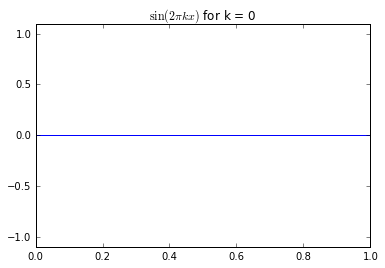

In [6]:
animation_tools.interact_animate_figs(figs)

Passing in the argument `manual=True` will use the widget `interact_manual` instead of `interact`.  This refrains from updating the image as you move the slider bar.  Instead you move the slider as desired and then click on the `Run` button to re-display the image.  This is useful if there are many frames and you want to be able to jump to around without all the intermediate frames being displayed, which can slow down the response significantly.

In [7]:
animation_tools.interact_animate_figs(figs, manual=True)

The argument `TextInput=True` can be specified to produce a text input cell rather than a slider bar:

In [8]:
animation_tools.interact_animate_figs(figs, manual=True, TextInput=True)

Valid frameno values: from 0 to 10


## Animating a list of images

The tool `animation_tools.interact_animate_images` can be used to create an interact that loops over all the frames contained in a list of images rather than figures. The images can be generated from a list of figures, as illustrated in the next cell.  Or they can be read in from a directory of png files, for example, as illustrated later.

This function also takes the arguments `manual` and `TextInput` as described above, with default values `False`.

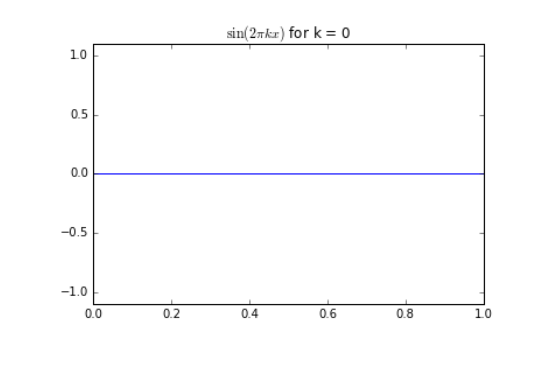

In [9]:
images = animation_tools.make_images(figs)
animation_tools.interact_animate_images(images)

## JSAnimation

A list of images can also be turned into a JSAnimation inline plot:

In [10]:
animation_tools.JSAnimate_images(images, figsize=(8,4))

Alternatively, a separate stand-alone html page can be created with the JSAnimation.  This can be posted on the web for others to view, for example.

In [11]:
anim = animation_tools.JSAnimate_images(images, figsize=(10,8))
# display(anim)  # to display it in the notebook

file_name = 'sine_functions.html'
animation_tools.make_html(anim, file_name=file_name, title="Sine Functions", 
                          raw_html="Illustration of html file created by <tt>make_html</tt>")
FileLink(file_name)

Created sine_functions.html


/Users/rjl/git/geohackweek/visualization/notebooks/sine_functions.html

## Create a directory of png files

Sometimes it is useful to create a directory containing png files for each figure, or you might have such a directory generated by other means (e.g. from VisClaw).

Here we create a directory named `_plots` to store png files for each frame:

In [12]:
plotdir = '_plots'
animation_tools.make_plotdir(plotdir, clobber=True)

Figure files for each frame will be stored in  _plots


You can create frames any way you wish and then use `animation_tools.save_frame` to save each one.  You can also explicitly call `savefig`, but then you should construct file names such that `glob.glob` can be used to return a list of filenames in the directory that are in the correct order for plotting as frames in an animation.  The `animation_tools.save_frame` creates names such as `frame00000.png` etc. as shown below.  The optional argument `fname_base` can be used to change `frame` to something else.

In [13]:
x = linspace(0,1,1000)

for k in range(5):
    fig = figure()
    plot(x, cos(2*pi*k*x), 'b')
    ylim(-1.1,1.1)
    title('$\cos(2\pi kx)$ for k = %s' % k)
    animation_tools.save_frame(k, verbose=True)
    close(fig)

Saved  _plots/frame00000.png
Saved  _plots/frame00001.png
Saved  _plots/frame00002.png
Saved  _plots/frame00003.png
Saved  _plots/frame00004.png


In [14]:
FileLinks(plotdir)

_plots/
  frame00000.png
  frame00001.png
  frame00002.png
  frame00003.png
  frame00004.png

Given such a directory of png files, we can read them in using `animation_tools.read_images` to produce a list of images:

In [15]:
cosine_images = animation_tools.read_images(plotdir='_plots', fname_pattern='frame*.png')
print "Found %i images" % len(cosine_images)

Found 5 images


The resulting list of images `new_images` can now be animated using any of the tools illustrated earlier, e.g.

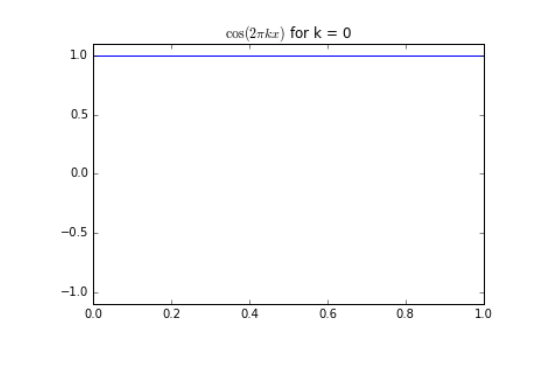

In [16]:
animation_tools.interact_animate_images(cosine_images)

## Saving a list of figures or images

If you already have a list of figures or images and wish to create a directory containing them, the utilities `animation_tools.save_figs` or `animation_tools.save_images` can be used.  For example:

In [17]:
reload(animation_tools)

animation_tools.save_images(cosine_images, plotdir='cosine_images', fname_base='wavenumber', 
                            format='jpg', verbose=True, kwargs={'dpi':150})
FileLinks('cosine_images')

Figure files for each frame will be stored in  cosine_images
Saved  cosine_images/wavenumber00000.jpg
Saved  cosine_images/wavenumber00001.jpg
Saved  cosine_images/wavenumber00002.jpg
Saved  cosine_images/wavenumber00003.jpg
Saved  cosine_images/wavenumber00004.jpg


cosine_images/
  wavenumber00000.jpg
  wavenumber00001.jpg
  wavenumber00002.jpg
  wavenumber00003.jpg
  wavenumber00004.jpg

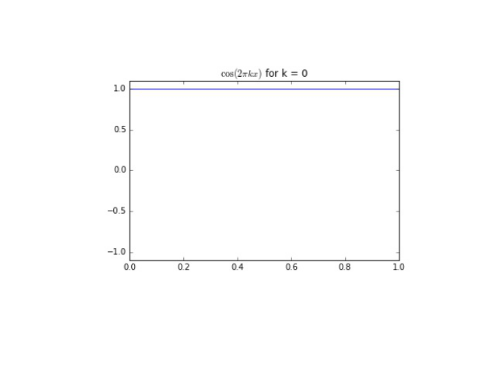

In [18]:
reload_images = animation_tools.read_images(plotdir='cosine_images', fname_pattern='wavenumber*.jpg')
animation_tools.interact_animate_images(reload_images)